# BACKORDER PREDICTION - CAPSTONE PROJECT

## Problem Statement

The question here is to predict whether a particular product will go on back order or not. Backorder is a scenerio in which when a particular product ordered by the customer is sent to them due to various reasons such as an mismanagement in inventory,  delay in transit,etc.

# About the dataset (BACKORDER PREDICTION DATASET)

1.	**national_inv** : 	Current inventory level for the part
2.	**lead_time** :	Transit time for product (if available)
3.	**in_transit_qty** :	Amount of product in transit from source
4.	**forecast_3_month** :	Forecast sales for the next 3 months
5.	**forecast_6_month**  :	Forecast sales for the next 6 months
6.	**forecast_9_month** 	Forecast sales for the next 9 months
7.	**sales_1_month** :	Sales quantity for the prior 1-month time period
8.	**sales_3_month** :	Sales quantity for the prior 3-month time period
9.	**sales_6_month** :	Sales quantity for the prior 6-month time period
10.	**sales_9_month** :	Sales quantity for the prior 9-month time period
11.	**min_bank** :	Minimum recommend amount to stock
12.	**potential_issue** :	Source issue for part identified
13.	**pieces_past_due** :	Parts overdue from source
14.	**perf_6_month_avg** :	Source performance for prior 6 month period
15.	**perf_12_month_avg** :	Source performance for prior 12-month period
16.	**local_bo_qty** :	Amount of stock orders overdue
17.	**deck_risk** :	Part risk flag
18.	**oe_constraint** :	Part risk flag
19.	**ppap_risk** :	Part risk flag
20.	**stop_auto_buy** :	Part risk flag
21.	**rev_stop** :	Part risk flag


# Table of Content

 **[Import Libraries](#lib)**

 **[Loading the Dataset](#prep)**

  <a id = "lib" ></a>
#  Importing Libraries

In [169]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,cohen_kappa_score,confusion_matrix,roc_auc_score,roc_curve,f1_score,precision_score,recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from warnings import filterwarnings 
filterwarnings("ignore")
from scipy import stats

<a id = "prep"><a/>
 # Loading the Dataset

In [170]:
#we are loading the dataset which is in CSV format using pd.read_csv
df = pd.read_csv("Training_Dataset_v2.csv")
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


# Exploratory data analysis of the dataset

The shape of the dataset

In [171]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 1687861 rows and 23 columns


The datatypes of the columns present in the dataset

In [172]:
#dtypes show the datatype of each column in the dataset
df.dtypes

sku                   object
national_inv         float64
lead_time            float64
in_transit_qty       float64
forecast_3_month     float64
forecast_6_month     float64
forecast_9_month     float64
sales_1_month        float64
sales_3_month        float64
sales_6_month        float64
sales_9_month        float64
min_bank             float64
potential_issue       object
pieces_past_due      float64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty         float64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

Checking for Null values

In [173]:
#Isnull.sum() shows the no of nulls present in each column
df.isnull().sum()

sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

 we see that the last row of the dataset is completely null, hence we are dropping the row

In [174]:
#we are dropping the last row which is colpletely null
df.drop(1687860,inplace=True)

Checking for null again, after dropping the last row

In [175]:
#checking for null again after dropping the last row
df.isnull().sum()

sku                       0
national_inv              0
lead_time            100893
in_transit_qty            0
forecast_3_month          0
forecast_6_month          0
forecast_9_month          0
sales_1_month             0
sales_3_month             0
sales_6_month             0
sales_9_month             0
min_bank                  0
potential_issue           0
pieces_past_due           0
perf_6_month_avg          0
perf_12_month_avg         0
local_bo_qty              0
deck_risk                 0
oe_constraint             0
ppap_risk                 0
stop_auto_buy             0
rev_stop                  0
went_on_backorder         0
dtype: int64

Five point summary of the dataset

In [176]:
#describe gives a five point summary
df.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
mean,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,5.277230e+01,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01
std,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,1.254983e+03,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


Checking the distribution of the target variable labels

<AxesSubplot:xlabel='went_on_backorder', ylabel='count'>

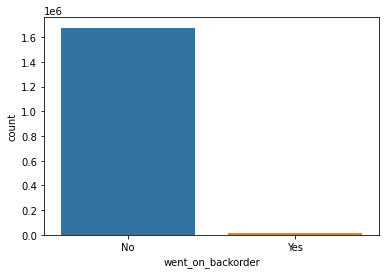

In [177]:
# to check the distribution of the target variable we are using the count plot
sns.countplot(df["went_on_backorder"])

Checking correlation among numerical variables

<AxesSubplot:>

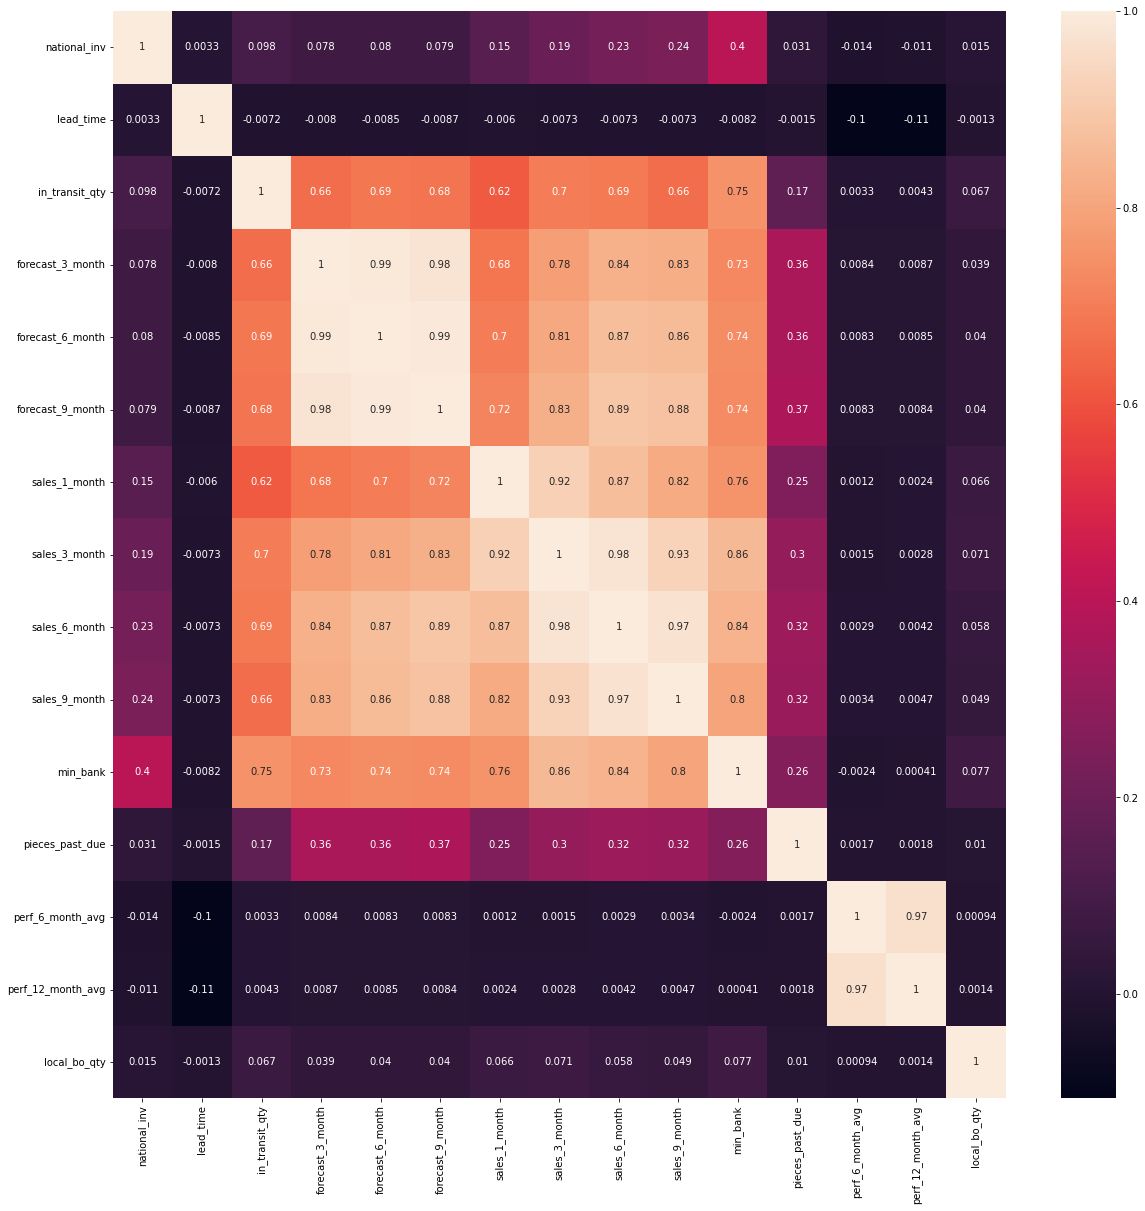

In [178]:
# check for correlation amoong the numeric variables using heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot = True)

In [179]:
#checking for multicollinearity, having a correlation of 0.6 and above

<AxesSubplot:>

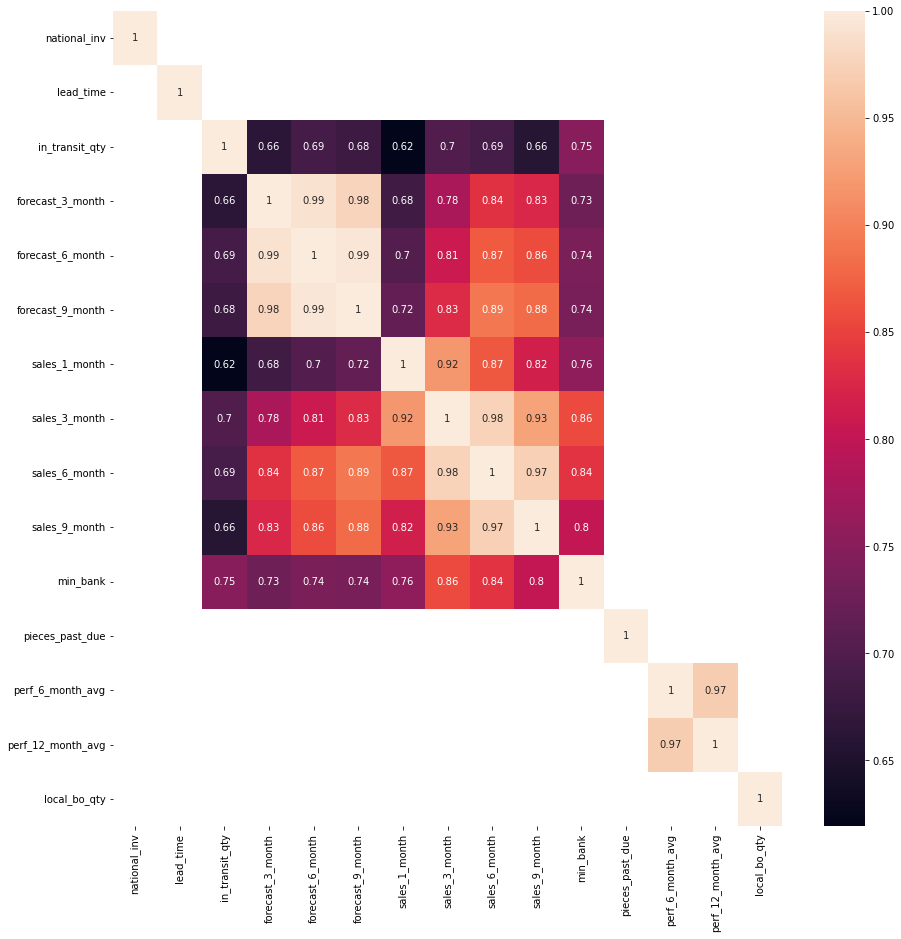

In [180]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr()[df.corr()>0.6], annot=True)

# Imputing the Null values

<AxesSubplot:xlabel='lead_time'>

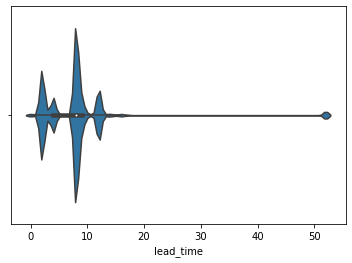

In [181]:
# we are checking the distribution of the leadtime using violinplot
sns.violinplot(df["lead_time"])

In [182]:
# we can see that the lead time is left skewed hence we are filling it using median
df["lead_time"] = df["lead_time"].fillna(df["lead_time"].median())

In [183]:
df.isnull().sum()

sku                  0
national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

# Addressing the Non Standard Null value

we can see that there is -99.00 in the performance 12 month average, which does not make any sense in the performance column

In [184]:
df["perf_12_month_avg"].value_counts().head()

 0.99     132425
-99.00    122050
 0.78     117662
 0.98      92825
 0.97      66029
Name: perf_12_month_avg, dtype: int64

we can see that there is -99.00 in the performance 6 month average, which does not make any sense in the performance column

In [185]:
df["perf_6_month_avg"].value_counts().head()

 0.99     143757
 1.00     132329
-99.00    129478
 0.73     106468
 0.98      83611
Name: perf_6_month_avg, dtype: int64

We are replacing the -99 with null 

In [186]:
# we can see that there are non standard null value ie -99 in the two performace columns. hence we are replacing them with null
df["perf_12_month_avg"].replace({-99.00:np.nan},inplace=True)
df["perf_6_month_avg"].replace({-99.00:np.nan},inplace=True)

In [187]:
df.isnull().sum()

sku                       0
national_inv              0
lead_time                 0
in_transit_qty            0
forecast_3_month          0
forecast_6_month          0
forecast_9_month          0
sales_1_month             0
sales_3_month             0
sales_6_month             0
sales_9_month             0
min_bank                  0
potential_issue           0
pieces_past_due           0
perf_6_month_avg     129478
perf_12_month_avg    122050
local_bo_qty              0
deck_risk                 0
oe_constraint             0
ppap_risk                 0
stop_auto_buy             0
rev_stop                  0
went_on_backorder         0
dtype: int64

Checking the distribution of the performance columns 

<AxesSubplot:xlabel='perf_6_month_avg', ylabel='Density'>

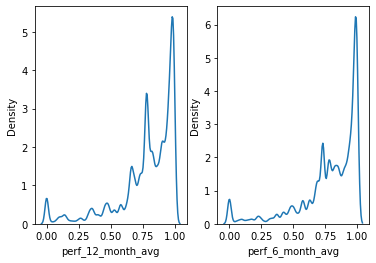

In [188]:
plt.subplot(1,2,1)
sns.kdeplot(df["perf_12_month_avg"])
plt.subplot(1,2,2)
sns.kdeplot(df["perf_6_month_avg"])

Since both of the performance are left skewed we are replacing them with median

In [189]:

df["perf_12_month_avg"]=df["perf_12_month_avg"].fillna(df["perf_12_month_avg"].median())
df["perf_6_month_avg"]=df["perf_6_month_avg"].fillna(df["perf_6_month_avg"].median())

In [190]:
df.isnull().sum()

sku                  0
national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

we are dropping the SKU column, which is unique and denotes the product ID. 

In [191]:

df.drop(["sku"],axis =1,inplace = True)

Checking for skewness in the overall datasets

In [192]:
df.skew()

national_inv         340.285800
lead_time              4.695413
in_transit_qty       166.183404
forecast_3_month     138.968325
forecast_6_month     138.961427
forecast_9_month     143.298875
sales_1_month        196.119990
sales_3_month        141.286380
sales_6_month        139.176712
sales_9_month        135.054191
min_bank             131.212649
pieces_past_due      412.391900
perf_6_month_avg      -1.700319
perf_12_month_avg     -1.720717
local_bo_qty         165.190548
dtype: float64

we can see that the numerical columns are right skewed, in order to not lose any data we are tranforming the data

# Transforming the numeric columns

Since we have 0 and also negative values we are using power transformer

In [193]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

We are using iloc to tranform only the numeric columns

In [194]:
df.iloc[:,:10] = pt.fit_transform(df.iloc[:,:10])
df.iloc[:,12:16] = pt.fit_transform(df.iloc[:,12:16])

# Encoding the function

As we have only "Yes" and "NO" in our categorical columns. We are mapping the categorical columns with 1 and 0.(encoding the categorical columns using dummy encoding)

In [195]:
df_num = df.select_dtypes(np.number)
df_cat = df.select_dtypes(object)

In [196]:
df_encoded = pd.get_dummies(data = df_cat,drop_first = True)
df_encoded.head()

,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes,went_on_backorder_Yes
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,1,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,1,0,0,1,0,0


In [197]:
df_full = pd.concat([df_num,df_encoded],axis =1)

In [198]:
df_full.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes,went_on_backorder_Yes
0,-0.065044,0.308325,-0.500204,-0.640153,-0.716508,-0.757403,-0.805595,-0.95858,-1.049791,-1.102320,0.0,-0.123332,0.070643,-0.005105,-0.11842,0,0,0,0,1,0,0
1,-0.063067,0.489802,-0.500204,-0.640153,-0.716508,-0.757403,-0.805595,-0.95858,-1.049791,-1.102320,0.0,-0.123332,1.218821,1.337567,-0.11842,0,0,0,0,1,0,0
2,-0.063067,0.308325,-0.500204,-0.640153,-0.716508,-0.757403,-0.805595,-0.95858,-1.049791,-1.102320,0.0,-0.123332,0.070643,-0.005105,-0.11842,0,1,0,0,1,0,0
3,-0.059309,0.308325,-0.500204,-0.640153,-0.716508,-0.757403,-0.805595,-0.95858,-1.049791,-1.102320,1.0,-0.123332,-2.010443,-2.012321,-0.11842,0,0,0,0,1,0,0
4,-0.058648,0.308325,-0.500204,-0.640153,-0.716508,-0.757403,-0.805595,-0.95858,-1.049791,-0.049247,2.0,-0.123332,0.070643,-0.005105,-0.11842,0,1,0,0,1,0,0


# Train Test Split

In [199]:
# we are splitting the data into test and train , where we will use the train data to train the model and test to test the model
from sklearn.model_selection import train_test_split
X = df_full.drop(["went_on_backorder_Yes"],axis =1)
y = df_full["went_on_backorder_Yes"]

In [200]:
# WE ARE CHECKING THE SHAPE OF THE TRAIN AND TEST DATASETS.INORDER TO MAKE SURE THAT TRAIN TEST SPLIT IS RIGHTLY DONE
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=96)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1181502, 21)
(506358, 21)
(1181502,)
(506358,)


In [201]:
# we are checking whether the two population means are equal usinig the independent t test
stats.ttest_ind(xtrain,xtest)

Ttest_indResult(statistic=array([ 1.06049934,  0.01932973,  1.6593452 ,  1.39769436,  1.17186593,
        1.58943361,  2.40249542,  1.94121216,  1.92799063,  2.0175531 ,
       -0.83797298,  0.70098771,  0.91835325,  0.88351616,  1.25993847,
        0.80450034, -0.00439329,  0.76683396, -0.45257836, -0.24102309,
       -0.46015098]), pvalue=array([0.28891764, 0.98457807, 0.09704644, 0.16220505, 0.24125105,
       0.11196272, 0.01628375, 0.05223272, 0.05385646, 0.04363798,
       0.402046  , 0.48331078, 0.35843409, 0.37695758, 0.20769173,
       0.42110819, 0.99649467, 0.44318035, 0.65085245, 0.80953725,
       0.64540791]))

In [202]:
xtest_copy = xtest.copy()

# Scaling the independent numeric columns

In [203]:
# we are scaling the dataset to make the mean 0 and standard deviation 1.It will be usefull for us in distance based algorithms
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
xtrain_ss = xtrain.copy()
xtest_ss = xtest.copy()

As used in transformation, we are using iloc to scale only the numeric columns

In [204]:
# since we have numerical columns only upto 15th column we are using standard scaler only upto it
xtrain_ss.iloc[:,:15] = ss.fit_transform(xtrain_ss.iloc[:,:15])


In [205]:
# checking whether the data is scaled
xtrain_ss.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes
913582,-0.031994,3.523803,-0.500662,-0.640596,-0.716804,-0.757905,-0.806504,-0.278068,-0.492161,-0.050254,-0.036458,-0.123511,-0.478156,-0.323596,-0.118741,0,1,0,0,0,0
718498,-0.023202,-1.515064,2.047734,1.690827,1.599085,1.542340,1.566165,1.397553,1.381861,1.330304,-0.023812,-0.123511,0.677181,1.042966,-0.118741,0,0,0,0,1,0
131098,0.060935,0.308231,2.162200,1.837724,1.739868,1.702493,1.786624,1.726928,1.695786,1.699436,0.171791,-0.123511,1.218494,1.138679,-0.118741,0,0,0,0,1,0
1144795,-0.020068,0.308231,-0.500662,1.666073,1.587543,1.523137,1.376748,1.301812,1.342159,1.330304,-0.016224,-0.123511,1.029205,1.138679,-0.118741,0,0,0,0,1,0
19216,-0.025696,-1.515064,-0.500662,1.690827,1.587543,1.539764,1.472366,1.384306,1.367333,1.340782,-0.006949,-0.123511,1.218494,1.337259,-0.118741,0,0,0,0,1,0


Since we need a scaled x test to feed to the model and get insights we are scaling the x test as well

In [206]:
xtest_ss.iloc[:,:15] = ss.fit_transform(xtest_ss.iloc[:,:15])
xtest_ss.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes
851321,-0.051300,0.308545,-0.499134,-0.639122,1.087960,1.135059,1.053247,0.961352,0.827504,1.038485,-0.037079,-0.122913,1.317662,0.436910,-0.117667,0,0,0,1,1,0
1097401,-0.042207,0.308545,1.176641,1.589103,1.514578,1.484403,1.246585,1.121619,1.106499,1.143361,-0.037792,-0.122913,1.317662,1.441214,-0.117667,0,0,0,0,1,0
1057956,-0.057925,0.308545,-0.499134,-0.639122,-0.715817,-0.756234,-0.803477,-0.957076,-1.048119,-1.100466,-0.037792,-0.122913,0.071704,-0.004065,-0.117667,0,1,0,1,0,0
25479,-0.062154,-0.683196,-0.499134,1.309186,1.008216,0.831430,-0.803477,-0.957076,-1.048119,-1.100466,-0.038505,-0.122913,-1.919959,-2.023563,-0.117667,0,1,0,1,1,0
180284,-0.062154,0.308545,-0.499134,-0.639122,-0.715817,-0.756234,-0.803477,-0.957076,-1.048119,-1.100466,-0.038505,-0.122913,0.071704,-0.004065,-0.117667,0,0,0,0,1,0


# SMOTE

In [207]:
from imblearn.over_sampling import SMOTE

Since we have a imbalanced target vairable we are smoting the dataset. In order to make the class labels equal in number. 
Smoting create synthetic data for the minority class

In [208]:
# we are assigning smote function to a variable smo and giving it a random state as 78
smo = SMOTE(random_state=78)

In [209]:
# we are now feeding the xtrain and ytrain to the smote, it will now create synthetic data and make the two classes equal
xtrain_sm,ytrain_sm = smo.fit_resample(xtrain_ss,ytrain)

<AxesSubplot:xlabel='went_on_backorder_Yes', ylabel='count'>

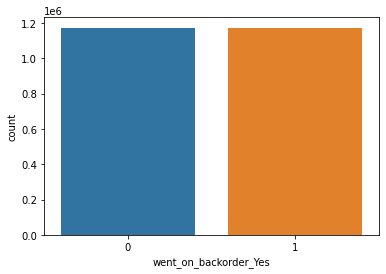

In [210]:
# we are checking the smoted target varaible distribution
sns.countplot(ytrain_sm)

In [211]:
xtrain_sm_copy = xtrain_sm.copy()

In [212]:
xtrain_sm.iloc[:,:15] = ss.fit_transform(xtrain_sm.iloc[:,:15])
xtrain_sm.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes
0,0.009569,3.655638,-0.440066,-1.125848,-1.217901,-1.260191,-1.067195,-0.551558,-0.764274,-0.276963,-0.032908,-0.242447,-0.322321,-0.177134,-0.274384,0,1,0,0,0,0
1,0.021024,-1.363834,2.383030,1.050456,1.074698,1.075457,1.326857,1.207089,1.238656,1.206668,-0.015157,-0.242447,0.770348,1.109066,-0.274384,0,0,0,0,1,0
2,0.130646,0.452443,2.509834,1.187580,1.214065,1.238075,1.549304,1.552784,1.574175,1.603360,0.259399,-0.242447,1.282299,1.199150,-0.274384,0,0,0,0,1,0
3,0.025107,0.452443,-0.440066,1.027349,1.063272,1.055959,1.135734,1.106604,1.196223,1.206668,-0.004506,-0.242447,1.103277,1.199150,-0.274384,0,0,0,0,1,0
4,0.017775,-1.363834,-0.440066,1.050456,1.063272,1.072841,1.232214,1.193186,1.223129,1.217929,0.008512,-0.242447,1.282299,1.386052,-0.274384,0,0,0,0,1,0


# Model building

Building a logistic regression model using both normal and smoted dataset

# Logistic Regression

In [213]:
from sklearn.linear_model import LogisticRegression

In [214]:
import statsmodels.api as sm

model using normal dataset

In [215]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
X_c = sm.add_constant(xtrain_ss)
logreg = sm.Logit(ytrain, X_c).fit()

# print the summary of the model
print(logreg.summary())

         Current function value: inf
         Iterations: 35
                             Logit Regression Results                            
Dep. Variable:     went_on_backorder_Yes   No. Observations:              1181502
Model:                             Logit   Df Residuals:                  1181480
Method:                              MLE   Df Model:                           21
Date:                   Fri, 29 Jul 2022   Pseudo R-squ.:                     inf
Time:                           20:42:32   Log-Likelihood:                   -inf
converged:                         False   LL-Null:                        0.0000
Covariance Type:               nonrobust   LLR p-value:                     1.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -5.7430      0.064    -90.176      0.000      -5.868      -5.618
national_inv       

Model using Smoted dataset

In [216]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
X_sm = sm.add_constant(xtrain_sm)
logreg_sm = sm.Logit(ytrain_sm, X_sm).fit()

# print the summary of the model
print(logreg_sm.summary())

         Current function value: inf
         Iterations: 35
                             Logit Regression Results                            
Dep. Variable:     went_on_backorder_Yes   No. Observations:              2347100
Model:                             Logit   Df Residuals:                  2347078
Method:                              MLE   Df Model:                           21
Date:                   Fri, 29 Jul 2022   Pseudo R-squ.:                     inf
Time:                           20:43:22   Log-Likelihood:                   -inf
converged:                         False   LL-Null:                        0.0000
Covariance Type:               nonrobust   LLR p-value:                     1.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.8852      0.010     88.479      0.000       0.866       0.905
national_inv       

In [217]:
# we are adding the constant to x test to predict the target variable
xt_c = sm.add_constant(xtest_ss)

In [218]:
# we are predicting the y for both the models, the one with smote and also the normal one
ypred1 = logreg.predict(xt_c)
ypred_sm1 = logreg_sm.predict(xt_c)

In [219]:
# Logitic regression in statsmodels library gives probolity as prediction we have to use a thresold value to find the classes.
#here we are using the default value ie 0.5
ypred1 = [1 if i >0.5 else 0 for i in ypred1]
ypred_sm1 = [1 if i >0.5 else 0 for i in ypred_sm1]

In [220]:
# we are printing the classification report for the y predicted from the normal model and y test 
print(classification_report(ypred1,ytest))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    506345
           1       0.00      0.54      0.00        13

    accuracy                           0.99    506358
   macro avg       0.50      0.77      0.50    506358
weighted avg       1.00      0.99      1.00    506358



In [221]:
# we are printing the classification report for the y predicted from the smoted model and y test 
print(classification_report(ypred_sm1,ytest))

              precision    recall  f1-score   support

           0       0.57      1.00      0.72    285238
           1       0.96      0.01      0.03    221120

    accuracy                           0.57    506358
   macro avg       0.76      0.51      0.38    506358
weighted avg       0.74      0.57      0.42    506358



In [222]:
# we are printing the confusion matrix for the y predicted from the normal model and y test 
confusion_matrix(ypred1,ytest)

array([[503011,   3334],
       [     6,      7]], dtype=int64)

In [223]:
# we are printing the confusion matrix for the y predicted from the smoted model and y test 
confusion_matrix(ypred_sm1,ytest)

array([[285089,    149],
       [217928,   3192]], dtype=int64)

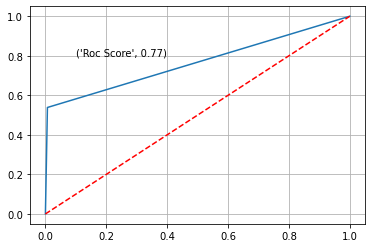

In [224]:
# here we are plottinig the false positivity rate and true positivity rate for the normal model
fpr_lr,tpr_lr,throshold_lr = roc_curve(ypred1,ytest)
plt.plot(fpr_lr,tpr_lr)
plt.plot([0,1],[0,1],"r--")
plt.text(x = 0.1,y = 0.8,s = ("Roc Score",round(roc_auc_score(ypred1,ytest),2)))
plt.grid()

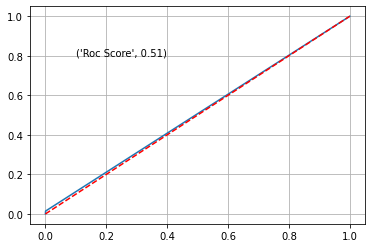

In [225]:
# here we are plottinig the false positivity rate and true positivity rate for the smoted model
fpr_lr,tpr_lr,throshold_lr = roc_curve(ypred_sm1,ytest)
plt.plot(fpr_lr,tpr_lr)
plt.plot([0,1],[0,1],"r--")
plt.text(x = 0.1,y = 0.8,s = ("Roc Score",round(roc_auc_score(ypred_sm1,ytest),2)))
plt.grid()

In [226]:
# Here we are defining a function which helps us to compare the metrics of the various models that we are going to build
# we are creating a dataframe named df_scores and assigining the metrics as columns in the dataframe
df_scores = pd.DataFrame(columns=['Model Name', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])
#we are giving two inputs to the function ie the model variable name and the model name that should be displayed
# we are also giving an if condition that works only for Logistic regression models , where they tend to give only probability values
# we are using the default threshold and predicting the classes in that case
def update_score_card(model,modelname):
    if  "Log" in modelname :
        x_c = sm.add_constant(xtest_ss)
        y_pred = model.predict(x_c)
        y_pred = [1 if i >0.5 else 0 for i in y_pred]
    else:
        y_pred = model.predict(xtest)
    global df_scores
    df_scores = df_scores.append({'Model Name': modelname,
                                    'AUC Score' : roc_auc_score(y_pred,ytest),
                                    'Precision Score': precision_score(y_pred,ytest),
                                    'Recall Score': recall_score(y_pred,ytest),
                                    'Accuracy Score': accuracy_score(y_pred,ytest),
                                    'Kappa Score':cohen_kappa_score(y_pred,ytest),
                                    'f1-score': f1_score(y_pred,ytest),
                                    'False Negatives': (confusion_matrix(y_pred,ytest)[1,0])}, 
                                    ignore_index = True)

In [227]:
# we are using the function built above for the models that we built.
update_score_card(logreg,"Logistic regression")
update_score_card(logreg_sm,"Logistic Regression Smoted")

In [228]:
# we are displying the updated scores
df_scores

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score,False Negatives
0,Logistic regression,0.765939,0.002095,0.538462,0.993404,0.004123,0.004174,6.0
1,Logistic Regression Smoted,0.506957,0.955403,0.014436,0.569322,0.015645,0.028441,217928.0


# Checking for multicollinearity using VIF and Treating it 

In [229]:
# Since there are multiple columns having high correlation among themselved it leads to multicollinearity. 
#Hence we are dealing the multicollinearity by finding them using VIF
# and dropping the columns

In [230]:
# we are creating a list of vif values for each columns in the train dataset
# then we are creating a dataframe and using the values and index as the respective column names
# we are also sorting them descendingly using sort_values function
vif_values = [vif(xtrain_ss.values,i)for i in range(len(xtrain_ss.columns))]
df_vif = pd.DataFrame(data = vif_values, columns = ["Vif_values"],index = xtrain_ss.columns).sort_values(by = "Vif_values",ascending = False)
df_vif

,Vif_values
sales_6_month,54.034334
sales_9_month,36.753215
sales_3_month,24.103316
forecast_6_month,18.577707
forecast_9_month,14.126444
sales_1_month,7.713665
perf_12_month_avg,6.671859
perf_6_month_avg,6.657613
forecast_3_month,5.994523
in_transit_qty,1.780708


In [231]:
# we are dropping the first columns that has the most multicollinearity
xtrain_ss.drop(["sales_6_month"],axis =1,inplace = True)

In [232]:
#we are repeating the same process here again until we reach the vif values less than 5
vif_values = [vif(xtrain_ss.values,i)for i in range(len(xtrain_ss.columns))]
df_vif = pd.DataFrame(data = vif_values, columns = ["Vif_values"],index = xtrain_ss.columns).sort_values(by = "Vif_values",ascending = False)
df_vif

,Vif_values
sales_3_month,18.612399
forecast_6_month,18.576075
forecast_9_month,14.113641
sales_9_month,11.796563
sales_1_month,7.712982
perf_12_month_avg,6.671683
perf_6_month_avg,6.657375
forecast_3_month,5.993713
in_transit_qty,1.780555
stop_auto_buy_Yes,1.388881


In [233]:
xtrain_ss.drop(["sales_3_month"],axis =1,inplace = True)

In [234]:
vif_values = [vif(xtrain_ss.values,i)for i in range(len(xtrain_ss.columns))]
df_vif = pd.DataFrame(data = vif_values, columns = ["Vif_values"],index = xtrain_ss.columns).sort_values(by = "Vif_values",ascending = False)
df_vif

,Vif_values
forecast_6_month,18.575040
forecast_9_month,14.089561
perf_12_month_avg,6.671683
perf_6_month_avg,6.657374
forecast_3_month,5.993582
sales_1_month,5.255571
sales_9_month,4.965814
in_transit_qty,1.780081
stop_auto_buy_Yes,1.388819
deck_risk_Yes,1.361212


In [235]:
xtrain_ss.drop(["forecast_6_month"],axis =1,inplace = True)

In [236]:
vif_values = [vif(xtrain_ss.values,i)for i in range(len(xtrain_ss.columns))]
df_vif = pd.DataFrame(data = vif_values, columns = ["Vif_values"],index = xtrain_ss.columns).sort_values(by = "Vif_values",ascending = False)
df_vif

,Vif_values
perf_12_month_avg,6.671682
perf_6_month_avg,6.657369
sales_1_month,5.253158
forecast_9_month,5.080654
sales_9_month,4.960441
forecast_3_month,4.273923
in_transit_qty,1.779225
stop_auto_buy_Yes,1.388650
deck_risk_Yes,1.360584
min_bank,1.218741


In [237]:
xtrain_ss.drop(["perf_12_month_avg"],axis =1,inplace = True)

In [238]:
vif_values = [vif(xtrain_ss.values,i)for i in range(len(xtrain_ss.columns))]
df_vif = pd.DataFrame(data = vif_values, columns = ["Vif_values"],index = xtrain_ss.columns).sort_values(by = "Vif_values",ascending = False)
df_vif

,Vif_values
sales_1_month,5.253103
forecast_9_month,5.080051
sales_9_month,4.960098
forecast_3_month,4.273754
in_transit_qty,1.779184
stop_auto_buy_Yes,1.384619
deck_risk_Yes,1.354095
min_bank,1.218664
national_inv,1.216292
ppap_risk_Yes,1.135837


In [239]:
xtrain_ss.drop(["sales_1_month"],axis =1,inplace = True)

In [240]:
vif_values = [vif(xtrain_ss.values,i)for i in range(len(xtrain_ss.columns))]
df_vif = pd.DataFrame(data = vif_values, columns = ["Vif_values"],index = xtrain_ss.columns).sort_values(by = "Vif_values",ascending = False)
df_vif

,Vif_values
forecast_9_month,5.066939
forecast_3_month,4.254054
sales_9_month,1.994059
in_transit_qty,1.705496
stop_auto_buy_Yes,1.384617
deck_risk_Yes,1.353991
min_bank,1.218603
national_inv,1.216095
ppap_risk_Yes,1.135768
perf_6_month_avg,1.062092


In [241]:
xtrain_ss.drop(["forecast_9_month"],axis =1,inplace = True)

In [242]:
vif_values = [vif(xtrain_ss.values,i)for i in range(len(xtrain_ss.columns))]
df_vif = pd.DataFrame(data = vif_values, columns = ["Vif_values"],index = xtrain_ss.columns).sort_values(by = "Vif_values",ascending = False)
df_vif

,Vif_values
sales_9_month,1.777994
in_transit_qty,1.688567
forecast_3_month,1.624458
stop_auto_buy_Yes,1.380248
deck_risk_Yes,1.341889
min_bank,1.218601
national_inv,1.215316
ppap_risk_Yes,1.135498
perf_6_month_avg,1.061306
pieces_past_due,1.052935


In [243]:
# Finally we can see that the vif values are below 5 hence we are stopping the vif process here.

# VIF treated Logistic regression model

In [244]:
#As it is a model using the statsmodels we are adding the constant from our end
X_c1 = sm.add_constant(xtrain_ss)
logreg_treated = sm.Logit(ytrain, X_c1).fit()

# print the summary of the model
print(logreg_treated.summary())

         Current function value: inf
         Iterations: 35
                             Logit Regression Results                            
Dep. Variable:     went_on_backorder_Yes   No. Observations:              1181502
Model:                             Logit   Df Residuals:                  1181486
Method:                              MLE   Df Model:                           15
Date:                   Fri, 29 Jul 2022   Pseudo R-squ.:                     inf
Time:                           20:47:54   Log-Likelihood:                   -inf
converged:                         False   LL-Null:                        0.0000
Covariance Type:               nonrobust   LLR p-value:                     1.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -5.7633      0.063    -90.991      0.000      -5.887      -5.639
national_inv       

In [245]:
a = list(xtrain_ss.columns)
xtrain_sm = xtrain_sm[a]


# VIF treated and Smoted Logitic regression model

In [246]:
X_sm = sm.add_constant(xtrain_sm)
logreg_sm_treated = sm.Logit(ytrain_sm, X_sm).fit()

# print the summary of the model
print(logreg_sm_treated.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 16
                             Logit Regression Results                            
Dep. Variable:     went_on_backorder_Yes   No. Observations:              2347100
Model:                             Logit   Df Residuals:                  2347084
Method:                              MLE   Df Model:                           15
Date:                   Fri, 29 Jul 2022   Pseudo R-squ.:                     inf
Time:                           20:48:27   Log-Likelihood:                   -inf
converged:                          True   LL-Null:                        0.0000
Covariance Type:               nonrobust   LLR p-value:                     1.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.7859      0.010     79.349      0.000       

In [247]:
xtest_ss = xtest_ss[a]
xtest_c = sm.add_constant(xtest_ss)

predicting the y pred usinig both the logistic regression models

In [248]:
ypred = logreg_treated.predict(xtest_c)
ypred_sm = logreg_sm_treated.predict(xtest_c)

In [249]:
ypred = [1 if i >0.5 else 0 for i in ypred]
ypred_sm = [1 if i >0.5 else 0 for i in ypred_sm]

Classification report for the normal Logistic regression model

In [250]:
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    506350
           1       0.00      0.50      0.00         8

    accuracy                           0.99    506358
   macro avg       0.50      0.75      0.50    506358
weighted avg       1.00      0.99      1.00    506358



Classification report for the Smoted logistic regresssion model

In [251]:
print(classification_report(ypred_sm,ytest))

              precision    recall  f1-score   support

           0       0.56      1.00      0.71    280013
           1       0.96      0.01      0.03    226345

    accuracy                           0.56    506358
   macro avg       0.76      0.51      0.37    506358
weighted avg       0.74      0.56      0.41    506358



In [252]:
confusion_matrix(ypred,ytest)

array([[503013,   3337],
       [     4,      4]], dtype=int64)

In [253]:
confusion_matrix(ypred_sm,ytest)

array([[279866,    147],
       [223151,   3194]], dtype=int64)

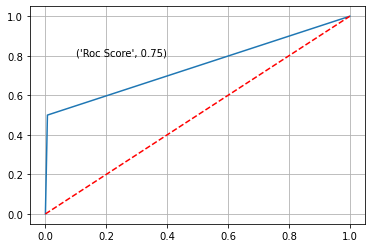

In [254]:
fpr_lr,tpr_lr,throshold_lr = roc_curve(ypred,ytest)
plt.plot(fpr_lr,tpr_lr)
plt.plot([0,1],[0,1],"r--")
plt.text(x = 0.1,y = 0.8,s = ("Roc Score",round(roc_auc_score(ypred,ytest),2)))
plt.grid()

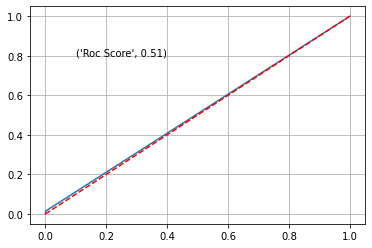

In [255]:
fpr_lr_sm,tpr_lr_sm,throshold_lr_sm = roc_curve(ypred_sm,ytest)
plt.plot(fpr_lr_sm,tpr_lr_sm)
plt.plot([0,1],[0,1],"r--")
plt.text(x = 0.1,y = 0.8,s = ("Roc Score",round(roc_auc_score(ypred_sm,ytest),2)))
plt.grid()

In [256]:
update_score_card(logreg_treated,"Logistic regression vif treated")
update_score_card(logreg_sm_treated,"Logistic Regression Smoted vif treated")

In [257]:
df_scores

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score,False Negatives
0,Logistic regression,0.765939,0.002095,0.538462,0.993404,0.004123,0.004174,6.0
1,Logistic Regression Smoted,0.506957,0.955403,0.014436,0.569322,0.015645,0.028441,217928.0
2,Logistic regression vif treated,0.746705,0.001197,0.5,0.993402,0.002357,0.002389,4.0
3,Logistic Regression Smoted vif treated,0.506793,0.956001,0.014111,0.559012,0.015003,0.027812,223151.0


In [258]:
xtest = xtest_copy
xtrain_sm = xtrain_sm_copy



In [259]:
xtrain.shape

(1181502, 21)

# Decision Tree classifier

In [260]:
from sklearn.tree import DecisionTreeClassifier


In [261]:
# we are assigining the decision tree model to variables called dtc and dtc_smote
dtc = DecisionTreeClassifier(random_state=10)
dtc.fit(xtrain,ytrain)
dtc_smote = DecisionTreeClassifier(random_state=10)
dtc_smote.fit(xtrain_sm,ytrain_sm)

DecisionTreeClassifier(random_state=10)

In [262]:
# predicting the target variable using the models built
ypred_dtc = dtc.predict(xtest)
ypred_dtc_sm = dtc_smote.predict(xtest)

In [263]:
print(classification_report(ypred_dtc,ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    502776
           1       0.40      0.37      0.39      3582

    accuracy                           0.99    506358
   macro avg       0.70      0.68      0.69    506358
weighted avg       0.99      0.99      0.99    506358



In [264]:
print(classification_report(ypred_dtc_sm,ytest))

              precision    recall  f1-score   support

           0       0.39      1.00      0.56    195275
           1       0.88      0.01      0.02    311083

    accuracy                           0.39    506358
   macro avg       0.63      0.50      0.29    506358
weighted avg       0.69      0.39      0.23    506358



In [265]:
confusion_matrix(ypred_dtc,ytest)

array([[500770,   2006],
       [  2247,   1335]], dtype=int64)

In [266]:
confusion_matrix(ypred_dtc_sm,ytest)

array([[194874,    401],
       [308143,   2940]], dtype=int64)

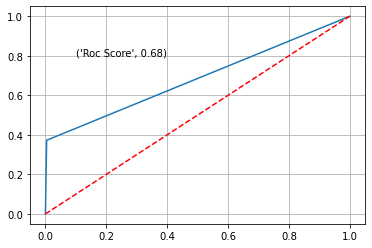

In [267]:
fpr_dtc,tpr_dtc,throshold_dtc = roc_curve(ypred_dtc,ytest)
plt.plot(fpr_dtc,tpr_dtc)
plt.plot([0,1],[0,1],"r--")
plt.text(x = 0.1,y = 0.8,s = ("Roc Score",round(roc_auc_score(ypred_dtc,ytest),2)))
plt.grid()

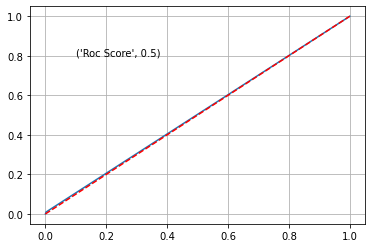

In [268]:
fpr_dtc,tpr_dtc,throshold_dtc = roc_curve(ypred_dtc_sm,ytest)
plt.plot(fpr_dtc,tpr_dtc)
plt.plot([0,1],[0,1],"r--")
plt.text(x = 0.1,y = 0.8,s = ("Roc Score",round(roc_auc_score(ypred_dtc_sm,ytest),2)))
plt.grid()

In [269]:
update_score_card(dtc,"Decision tree")
update_score_card(dtc_smote,"Decision tree smoted")

In [270]:
df_scores

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score,False Negatives
0,Logistic regression,0.765939,0.002095,0.538462,0.993404,0.004123,0.004174,6.0
1,Logistic Regression Smoted,0.506957,0.955403,0.014436,0.569322,0.015645,0.028441,217928.0
2,Logistic regression vif treated,0.746705,0.001197,0.5,0.993402,0.002357,0.002389,4.0
3,Logistic Regression Smoted vif treated,0.506793,0.956001,0.014111,0.559012,0.015003,0.027812,223151.0
4,Decision tree,0.684353,0.399581,0.372697,0.991601,0.381448,0.385671,2247.0
5,Decision tree smoted,0.503699,0.879976,0.009451,0.39066,0.00572,0.018701,308143.0


# Random Forest

Building models on random forest 

In [271]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier

In [272]:
# building two models one with the original dataset and the other using the smoted data
ranfor_smote = RandomForestClassifier(n_estimators=100,class_weight="balanced",n_jobs =-1,max_depth = 8,max_features = None)
ranfor_smote.fit(xtrain_sm,ytrain_sm)
ranfor = RandomForestClassifier(n_estimators=100,n_jobs =-1,max_depth = 8,max_features = None)
ranfor.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=8, max_features=None, n_jobs=-1)

In [273]:
#predicting the target variable using the models built
y_pred_rf_sm = ranfor_smote.predict(xtest)
y_pred_rf = ranfor.predict(xtest)

Classification report for the smoted Random forest model

In [274]:
print(classification_report(y_pred_rf_sm,ytest))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75    302251
           1       0.91      0.01      0.03    204107

    accuracy                           0.60    506358
   macro avg       0.76      0.51      0.39    506358
weighted avg       0.73      0.60      0.46    506358



In [275]:
confusion_matrix(y_pred_rf_sm,ytest)

array([[301955,    296],
       [201062,   3045]], dtype=int64)

Classification report for the normal Random forest model

In [276]:
print(classification_report(y_pred_rf,ytest))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    506335
           1       0.00      0.52      0.01        23

    accuracy                           0.99    506358
   macro avg       0.50      0.76      0.50    506358
weighted avg       1.00      0.99      1.00    506358



In [277]:
confusion_matrix(y_pred_rf,ytest)


array([[503006,   3329],
       [    11,     12]], dtype=int64)

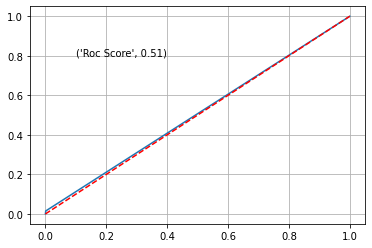

In [278]:
fpr_lr,tpr_lr,throshold_lr = roc_curve(y_pred_rf_sm,ytest)
plt.plot(fpr_lr,tpr_lr)
plt.plot([0,1],[0,1],"r--")
plt.text(x = 0.1,y = 0.8,s = ("Roc Score",round(roc_auc_score(y_pred_rf_sm,ytest),2)))
plt.grid()

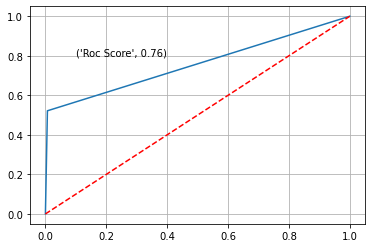

In [279]:
fpr_lr,tpr_lr,throshold_lr = roc_curve(y_pred_rf,ytest)
plt.plot(fpr_lr,tpr_lr)
plt.plot([0,1],[0,1],"r--")
plt.text(x = 0.1,y = 0.8,s = ("Roc Score",round(roc_auc_score(y_pred_rf,ytest),2)))
plt.grid()

In [280]:
update_score_card(ranfor,"Random Forest")
update_score_card(ranfor_smote,"Random Forest Smoted")

In [281]:
df_scores

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score,False Negatives
0,Logistic regression,0.765939,0.002095,0.538462,0.993404,0.004123,0.004174,6.0
1,Logistic Regression Smoted,0.506957,0.955403,0.014436,0.569322,0.015645,0.028441,217928.0
2,Logistic regression vif treated,0.746705,0.001197,0.5,0.993402,0.002357,0.002389,4.0
3,Logistic Regression Smoted vif treated,0.506793,0.956001,0.014111,0.559012,0.015003,0.027812,223151.0
4,Decision tree,0.684353,0.399581,0.372697,0.991601,0.381448,0.385671,2247.0
5,Decision tree smoted,0.503699,0.879976,0.009451,0.39066,0.00572,0.018701,308143.0
6,Random Forest,0.757582,0.003592,0.521739,0.993404,0.007045,0.007134,11.0
7,Random Forest Smoted,0.50697,0.911404,0.014919,0.602341,0.016588,0.029357,201062.0


# Naive Bayes model

In [282]:
from sklearn.naive_bayes import GaussianNB

In [283]:
# creating two models one using the original data and the other using the smoted dataset
gnb = GaussianNB()
gnb.fit(xtrain, ytrain)

gnb_SMOTE = GaussianNB()
gnb_SMOTE.fit(xtrain_sm, ytrain_sm)

GaussianNB()

In [284]:
#predicting the target variable usinig the models built
y_pred_gnb_sm = gnb_SMOTE.predict(xtest)
y_pred_gnb = gnb.predict(xtest)

In [285]:
print(classification_report(y_pred_gnb_sm,ytest))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90    414385
           1       0.48      0.02      0.03     91973

    accuracy                           0.82    506358
   macro avg       0.65      0.51      0.47    506358
weighted avg       0.76      0.82      0.74    506358



In [286]:
print(classification_report(y_pred_gnb,ytest))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95    458286
           1       0.45      0.03      0.06     48072

    accuracy                           0.90    506358
   macro avg       0.68      0.51      0.50    506358
weighted avg       0.86      0.90      0.87    506358



In [287]:
confusion_matrix(y_pred_gnb_sm,ytest)

array([[412648,   1737],
       [ 90369,   1604]], dtype=int64)

In [288]:
confusion_matrix(y_pred_gnb,ytest)

array([[456463,   1823],
       [ 46554,   1518]], dtype=int64)

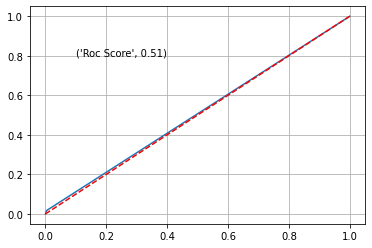

In [289]:
fpr_lr,tpr_lr,throshold_lr = roc_curve(y_pred_gnb_sm,ytest)
plt.plot(fpr_lr,tpr_lr)
plt.plot([0,1],[0,1],"r--")
plt.text(x = 0.1,y = 0.8,s = ("Roc Score",round(roc_auc_score(y_pred_gnb_sm,ytest),2)))
plt.grid()

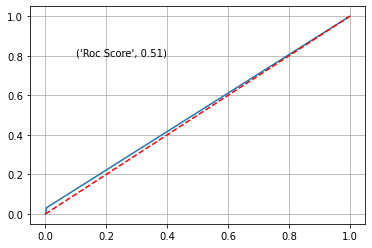

In [290]:
fpr_lr,tpr_lr,throshold_lr = roc_curve(y_pred_gnb,ytest)
plt.plot(fpr_lr,tpr_lr)
plt.plot([0,1],[0,1],"r--")
plt.text(x = 0.1,y = 0.8,s = ("Roc Score",round(roc_auc_score(y_pred_gnb,ytest),2)))
plt.grid()

In [291]:
update_score_card(gnb,"Gaussian Naive bayes")
update_score_card(gnb_SMOTE,"Gaussian Naive bayes smoted")

In [292]:
df_scores

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score,False Negatives
0,Logistic regression,0.765939,0.002095,0.538462,0.993404,0.004123,0.004174,6.0
1,Logistic Regression Smoted,0.506957,0.955403,0.014436,0.569322,0.015645,0.028441,217928.0
2,Logistic regression vif treated,0.746705,0.001197,0.5,0.993402,0.002357,0.002389,4.0
3,Logistic Regression Smoted vif treated,0.506793,0.956001,0.014111,0.559012,0.015003,0.027812,223151.0
4,Decision tree,0.684353,0.399581,0.372697,0.991601,0.381448,0.385671,2247.0
5,Decision tree smoted,0.503699,0.879976,0.009451,0.39066,0.00572,0.018701,308143.0
6,Random Forest,0.757582,0.003592,0.521739,0.993404,0.007045,0.007134,11.0
7,Random Forest Smoted,0.50697,0.911404,0.014919,0.602341,0.016588,0.029357,201062.0
8,Gaussian Naive bayes,0.5138,0.454355,0.031578,0.904461,0.047296,0.059051,46554.0
9,Gaussian Naive bayes smoted,0.506624,0.480096,0.01744,0.818101,0.021193,0.033657,90369.0


# XGBoost Classifier

In [293]:
from xgboost import XGBClassifier

In [294]:
# creating two models one using the original data and the other using the smoted dataset
xgboost = XGBClassifier()
xgboost.fit(xtrain,ytrain)
xgboost_sm = XGBClassifier()
xgboost_sm.fit(xtrain_sm,ytrain_sm)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [295]:
# predicting the target variables using the models built
y_pred_xgb_sm = xgboost_sm.predict(xtest)
y_pred_xgb = xgboost.predict(xtest)

In [296]:
print(classification_report(y_pred_xgb_sm,ytest))

              precision    recall  f1-score   support

           0       0.11      1.00      0.20     54861
           1       0.99      0.01      0.01    451497

    accuracy                           0.11    506358
   macro avg       0.55      0.50      0.11    506358
weighted avg       0.90      0.11      0.03    506358



In [297]:
print(classification_report(y_pred_xgb,ytest))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    505951
           1       0.08      0.65      0.14       407

    accuracy                           0.99    506358
   macro avg       0.54      0.82      0.57    506358
weighted avg       1.00      0.99      1.00    506358



In [298]:
confusion_matrix(y_pred_xgb_sm,ytest)

array([[ 54830,     31],
       [448187,   3310]], dtype=int64)

In [299]:
confusion_matrix(y_pred_xgb,ytest)

array([[502875,   3076],
       [   142,    265]], dtype=int64)

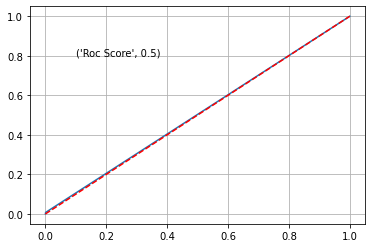

In [300]:
fpr_lr,tpr_lr,throshold_lr = roc_curve(y_pred_xgb_sm,ytest)
plt.plot(fpr_lr,tpr_lr)
plt.plot([0,1],[0,1],"r--")
plt.text(x = 0.1,y = 0.8,s = ("Roc Score",round(roc_auc_score(y_pred_xgb_sm,ytest),2)))
plt.grid()

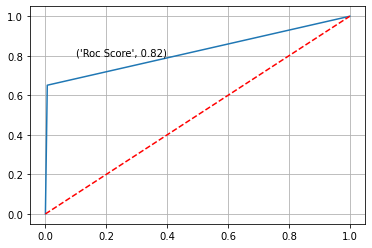

In [301]:
fpr_lr,tpr_lr,throshold_lr = roc_curve(y_pred_xgb,ytest)
plt.plot(fpr_lr,tpr_lr)
plt.plot([0,1],[0,1],"r--")
plt.text(x = 0.1,y = 0.8,s = ("Roc Score",round(roc_auc_score(y_pred_xgb,ytest),2)))
plt.grid()

In [302]:
update_score_card(xgboost,"XGBOOST")
update_score_card(xgboost_sm,"XGBOOST Smoted")

In [303]:
df_scores

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score,False Negatives
0,Logistic regression,0.765939,0.002095,0.538462,0.993404,0.004123,0.004174,6.0
1,Logistic Regression Smoted,0.506957,0.955403,0.014436,0.569322,0.015645,0.028441,217928.0
2,Logistic regression vif treated,0.746705,0.001197,0.5,0.993402,0.002357,0.002389,4.0
3,Logistic Regression Smoted vif treated,0.506793,0.956001,0.014111,0.559012,0.015003,0.027812,223151.0
4,Decision tree,0.684353,0.399581,0.372697,0.991601,0.381448,0.385671,2247.0
5,Decision tree smoted,0.503699,0.879976,0.009451,0.39066,0.00572,0.018701,308143.0
6,Random Forest,0.757582,0.003592,0.521739,0.993404,0.007045,0.007134,11.0
7,Random Forest Smoted,0.50697,0.911404,0.014919,0.602341,0.016588,0.029357,201062.0
8,Gaussian Naive bayes,0.5138,0.454355,0.031578,0.904461,0.047296,0.059051,46554.0
9,Gaussian Naive bayes smoted,0.506624,0.480096,0.01744,0.818101,0.021193,0.033657,90369.0


# Ada Boost

In [304]:
# creating two models one using the original data and the other using the smoted dataset
ada_model = AdaBoostClassifier( random_state = 10)
ada_model.fit(xtrain, ytrain)
ada_model_sm = AdaBoostClassifier( random_state = 10)
ada_model_sm.fit(xtrain_sm, ytrain_sm)

AdaBoostClassifier(random_state=10)

In [305]:
#predicting the target variable using the models built
y_pred_ada_sm = ada_model_sm.predict(xtest)
y_pred_ada = ada_model.predict(xtest)

In [306]:
print(classification_report(y_pred_ada_sm,ytest))

              precision    recall  f1-score   support

           0       0.38      1.00      0.55    193134
           1       0.98      0.01      0.02    313224

    accuracy                           0.39    506358
   macro avg       0.68      0.50      0.29    506358
weighted avg       0.75      0.39      0.22    506358



In [307]:
print(classification_report(y_pred_ada,ytest))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    505922
           1       0.04      0.28      0.06       436

    accuracy                           0.99    506358
   macro avg       0.52      0.64      0.53    506358
weighted avg       1.00      0.99      1.00    506358



In [308]:
confusion_matrix(y_pred_ada_sm,ytest)

array([[193052,     82],
       [309965,   3259]], dtype=int64)

In [309]:
confusion_matrix(y_pred_ada,ytest)

array([[502703,   3219],
       [   314,    122]], dtype=int64)

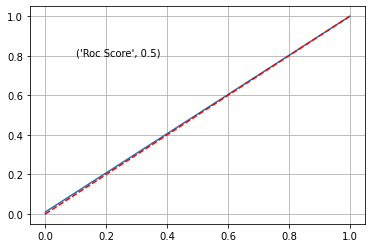

In [310]:
fpr_lr,tpr_lr,throshold_lr = roc_curve(y_pred_ada_sm,ytest)
plt.plot(fpr_lr,tpr_lr)
plt.plot([0,1],[0,1],"r--")
plt.text(x = 0.1,y = 0.8,s = ("Roc Score",round(roc_auc_score(y_pred_ada_sm,ytest),2)))
plt.grid()

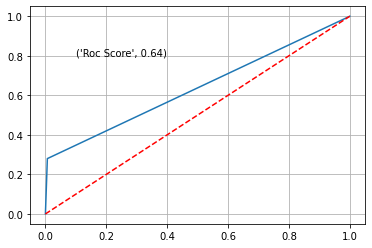

In [311]:
fpr_lr,tpr_lr,throshold_lr = roc_curve(y_pred_ada,ytest)
plt.plot(fpr_lr,tpr_lr)
plt.plot([0,1],[0,1],"r--")
plt.text(x = 0.1,y = 0.8,s = ("Roc Score",round(roc_auc_score(y_pred_ada,ytest),2)))
plt.grid()

In [312]:
update_score_card(ada_model,"Ada Boost")
update_score_card(ada_model_sm,"Ada Boost Smoted")

In [313]:
df_scores

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score,False Negatives
0,Logistic regression,0.765939,0.002095,0.538462,0.993404,0.004123,0.004174,6.0
1,Logistic Regression Smoted,0.506957,0.955403,0.014436,0.569322,0.015645,0.028441,217928.0
2,Logistic regression vif treated,0.746705,0.001197,0.5,0.993402,0.002357,0.002389,4.0
3,Logistic Regression Smoted vif treated,0.506793,0.956001,0.014111,0.559012,0.015003,0.027812,223151.0
4,Decision tree,0.684353,0.399581,0.372697,0.991601,0.381448,0.385671,2247.0
5,Decision tree smoted,0.503699,0.879976,0.009451,0.39066,0.00572,0.018701,308143.0
6,Random Forest,0.757582,0.003592,0.521739,0.993404,0.007045,0.007134,11.0
7,Random Forest Smoted,0.50697,0.911404,0.014919,0.602341,0.016588,0.029357,201062.0
8,Gaussian Naive bayes,0.5138,0.454355,0.031578,0.904461,0.047296,0.059051,46554.0
9,Gaussian Naive bayes smoted,0.506624,0.480096,0.01744,0.818101,0.021193,0.033657,90369.0


# Gradient Boosting

In [314]:
# creating two models one using the original data and the other using the smoted dataset
grad_model = GradientBoostingClassifier( random_state = 10)
grad_model.fit(xtrain, ytrain)
grad_model_sm = GradientBoostingClassifier( random_state = 10)
grad_model_sm.fit(xtrain_sm, ytrain_sm)

GradientBoostingClassifier(random_state=10)

In [315]:
#preidcting the target variable using the models built
y_pred_grad_sm = grad_model_sm.predict(xtest)
y_pred_grad = grad_model.predict(xtest)

In [316]:
print(classification_report(y_pred_grad_sm,ytest))

              precision    recall  f1-score   support

           0       0.52      1.00      0.68    260016
           1       0.96      0.01      0.03    246342

    accuracy                           0.52    506358
   macro avg       0.74      0.51      0.35    506358
weighted avg       0.73      0.52      0.36    506358



In [317]:
print(classification_report(y_pred_grad,ytest))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    506014
           1       0.04      0.38      0.07       344

    accuracy                           0.99    506358
   macro avg       0.52      0.69      0.53    506358
weighted avg       1.00      0.99      1.00    506358



In [318]:
confusion_matrix(y_pred_grad_sm,ytest)

array([[259876,    140],
       [243141,   3201]], dtype=int64)

In [319]:
confusion_matrix(y_pred_grad,ytest)

array([[502804,   3210],
       [   213,    131]], dtype=int64)

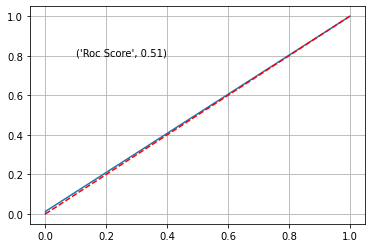

In [320]:
fpr_lr,tpr_lr,throshold_lr = roc_curve(y_pred_grad_sm,ytest)
plt.plot(fpr_lr,tpr_lr)
plt.plot([0,1],[0,1],"r--")
plt.text(x = 0.1,y = 0.8,s = ("Roc Score",round(roc_auc_score(y_pred_grad_sm,ytest),2)))
plt.grid()

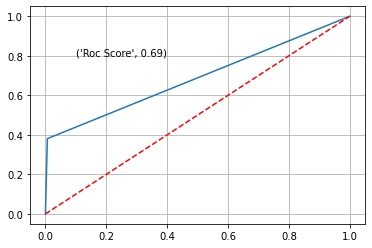

In [321]:
fpr_lr,tpr_lr,throshold_lr = roc_curve(y_pred_grad,ytest)
plt.plot(fpr_lr,tpr_lr)
plt.plot([0,1],[0,1],"r--")
plt.text(x = 0.1,y = 0.8,s = ("Roc Score",round(roc_auc_score(y_pred_grad,ytest),2)))
plt.grid()

In [322]:
update_score_card(grad_model,"Gradient Boost")
update_score_card(grad_model_sm,"Gradient Boost Smoted")

In [323]:
df_scores

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score,False Negatives
0,Logistic regression,0.765939,0.002095,0.538462,0.993404,0.004123,0.004174,6.0
1,Logistic Regression Smoted,0.506957,0.955403,0.014436,0.569322,0.015645,0.028441,217928.0
2,Logistic regression vif treated,0.746705,0.001197,0.5,0.993402,0.002357,0.002389,4.0
3,Logistic Regression Smoted vif treated,0.506793,0.956001,0.014111,0.559012,0.015003,0.027812,223151.0
4,Decision tree,0.684353,0.399581,0.372697,0.991601,0.381448,0.385671,2247.0
5,Decision tree smoted,0.503699,0.879976,0.009451,0.39066,0.00572,0.018701,308143.0
6,Random Forest,0.757582,0.003592,0.521739,0.993404,0.007045,0.007134,11.0
7,Random Forest Smoted,0.50697,0.911404,0.014919,0.602341,0.016588,0.029357,201062.0
8,Gaussian Naive bayes,0.5138,0.454355,0.031578,0.904461,0.047296,0.059051,46554.0
9,Gaussian Naive bayes smoted,0.506624,0.480096,0.01744,0.818101,0.021193,0.033657,90369.0


In [326]:
df_scores.sort_values(by = "Recall Score",ascending = False)




,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score,False Negatives
10,XGBOOST,0.822513,0.079318,0.651106,0.993645,0.140177,0.141409,142.0
0,Logistic regression,0.765939,0.002095,0.538462,0.993404,0.004123,0.004174,6.0
6,Random Forest,0.757582,0.003592,0.521739,0.993404,0.007045,0.007134,11.0
2,Logistic regression vif treated,0.746705,0.001197,0.5,0.993402,0.002357,0.002389,4.0
14,Gradient Boost,0.687235,0.03921,0.380814,0.99324,0.069953,0.071099,213.0
4,Decision tree,0.684353,0.399581,0.372697,0.991601,0.381448,0.385671,2247.0
12,Ada Boost,0.636727,0.036516,0.279817,0.993023,0.063174,0.064602,314.0
8,Gaussian Naive bayes,0.5138,0.454355,0.031578,0.904461,0.047296,0.059051,46554.0
9,Gaussian Naive bayes smoted,0.506624,0.480096,0.01744,0.818101,0.021193,0.033657,90369.0
7,Random Forest Smoted,0.50697,0.911404,0.014919,0.602341,0.016588,0.029357,201062.0
